In [2]:
# encoding: utf-8
from math import log
import operator
import treePlotter


# 获取数据5行3列，2个特征
def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels


dataSet, labels = createDataSet()
print(dataSet)
print(labels)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
['no surfacing', 'flippers']


In [120]:
# 计算系统熵
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)  # 获取数组的长度
#     print(numEntries)
    labelCounts = {}#创建空字典
    for featVec in dataSet:  # 计算数据集中不同类别的个数
        currentLabel = featVec[-1]  # 获取类别
#         print(currentLabel)
#         print(labelCounts.keys())
        if currentLabel not in labelCounts.keys(): labelCounts[currentLabel] = 0
#         print(labelCounts[currentLabel])
#         print(labelCounts.keys())
        labelCounts[currentLabel] += 1
#         print(labelCounts[currentLabel])
    shannonEnt = 0.0
#     print(labelCounts)
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries  # 概率
        shannonEnt -= prob * log(prob, 2)  # 熵
    return shannonEnt


shannonEnt = calcShannonEnt(dataSet)

In [121]:
# 划分特征，得到最优特征
# 输入参数：待划分的数据集dataSet，划分数据集的特征axis，需要返回的特征值value
def splitDataSet(dataSet, axis, value):
#     创建新列表，因为函数内部对列表对象修改会影响该列表的整个生命周期，所以创建一个新的列表
    retDataSet = []
#     遍历数据集里每个特征向量，每个特征向量包含多个特征值
    for featVec in dataSet:
# 将符合特征的数据抽取出来
        if featVec[axis] == value:
#         特征向量的前axis个
            reducedFeatVec = featVec[:axis]
# extend:得到包含两个列表所有元素的一个列表，从（axis + 1）个开始
            reducedFeatVec.extend(featVec[axis + 1:])
# append：如果两个都是列表，那么追加进来的新元素也是一个列表，也就是嵌套列表
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [122]:
retDataSet = splitDataSet(dataSet,1,1)
print(retDataSet)

[[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]


In [130]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)  # 系统熵
    bestInfoGain = 0.0;
    bestFeature = -1  # 初始最好的信息增益及特征
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]  # 取出特征值
#         print(featList)
        uniqueVals = set(featList)  # 防止重复
#         print(uniqueVals)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
#             print(subDataSet)
            prob = len(subDataSet) / float(len(dataSet))
#             条件熵
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy  # 信息增益
        if (infoGain > bestInfoGain):  # 计算最大信息增益
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [131]:
bestFeat = chooseBestFeatureToSplit(dataSet)
print(bestFeat)

0


In [132]:
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [133]:

def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel: {}}
    del (labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree

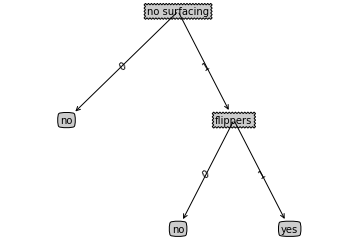

In [134]:
myTree = createTree(dataSet, labels)

treePlotter.createPlot(myTree)